# In this section, we will making a predictive model for heart attack cases. The dataset obtained from Kaggle (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

# The steps to make a model as explained below:

In [1]:
#import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('D:/UGM PASCASARJANA/MACHINE LEARNING/DATASETS/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Check for the unique values
list_col=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 
SEX :[1 0] 
CP :[3 2 1 0] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
FBS :[1

In [3]:
#check the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#check for the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
#get all features on the dataset
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Explore Data Analysis

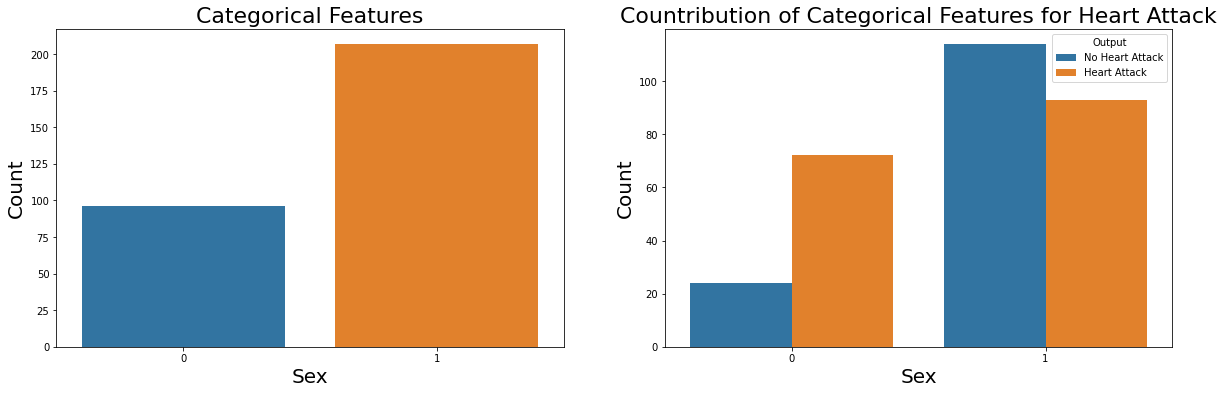

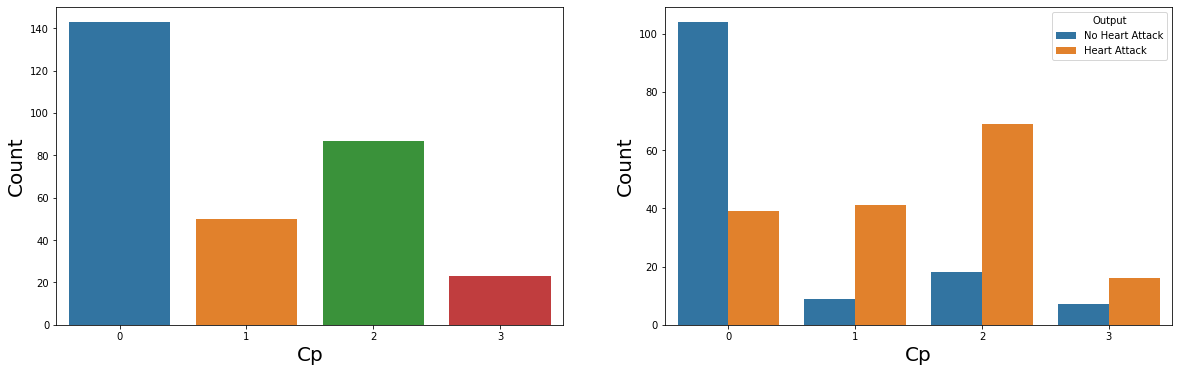

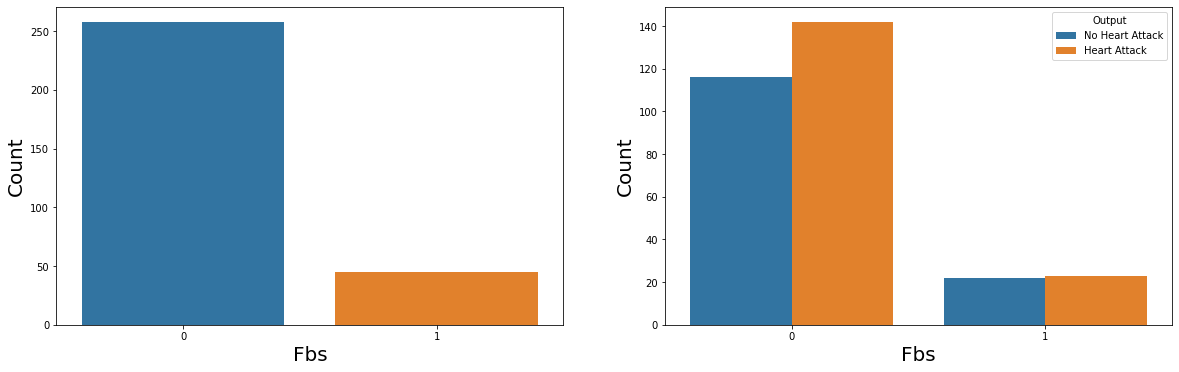

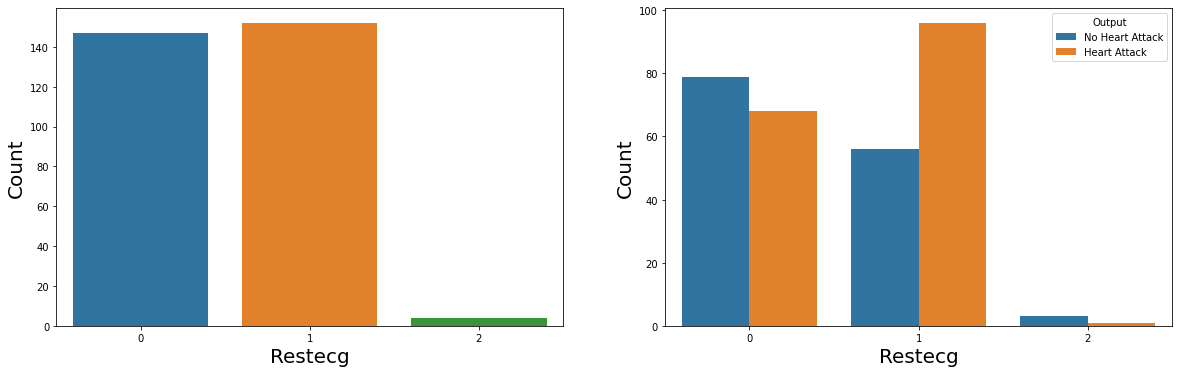

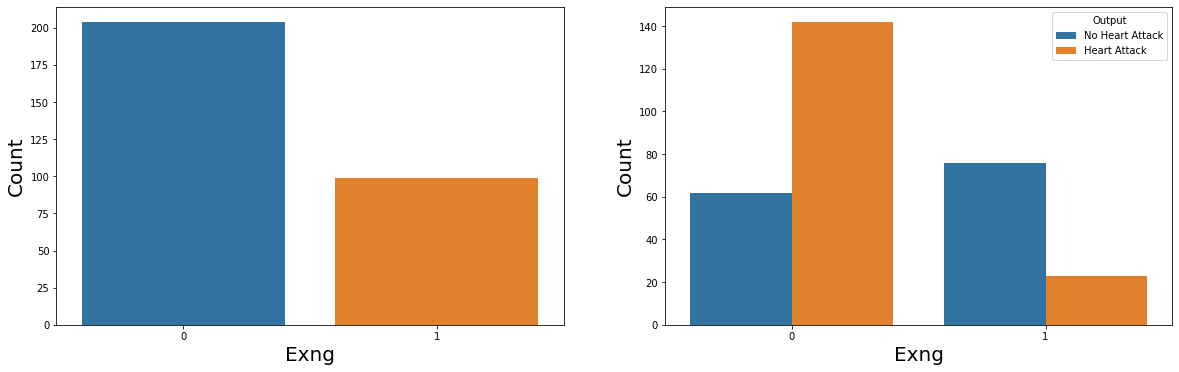

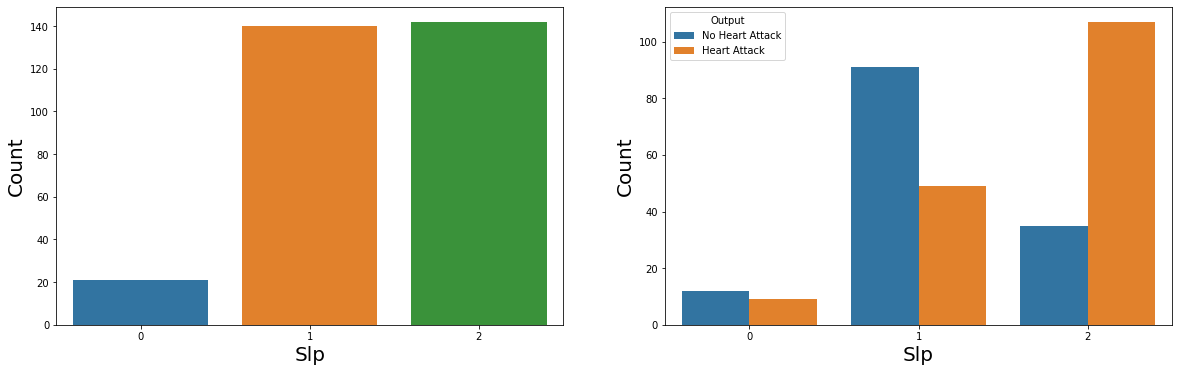

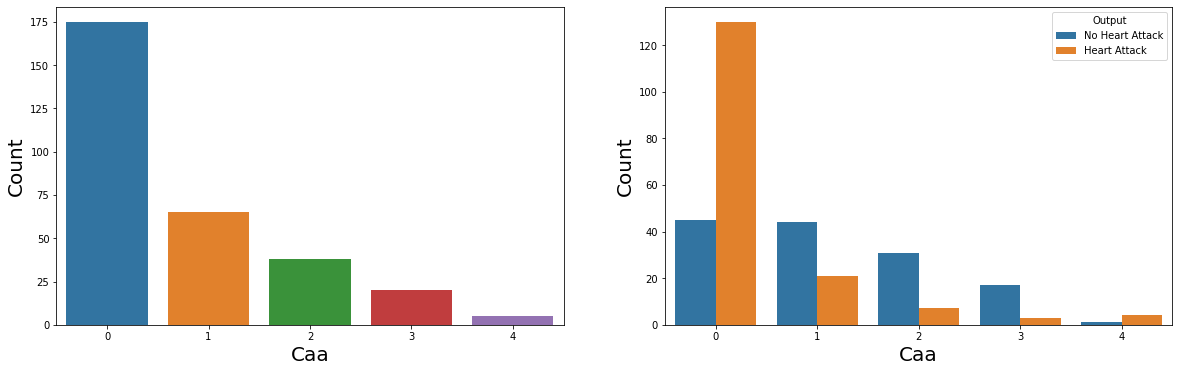

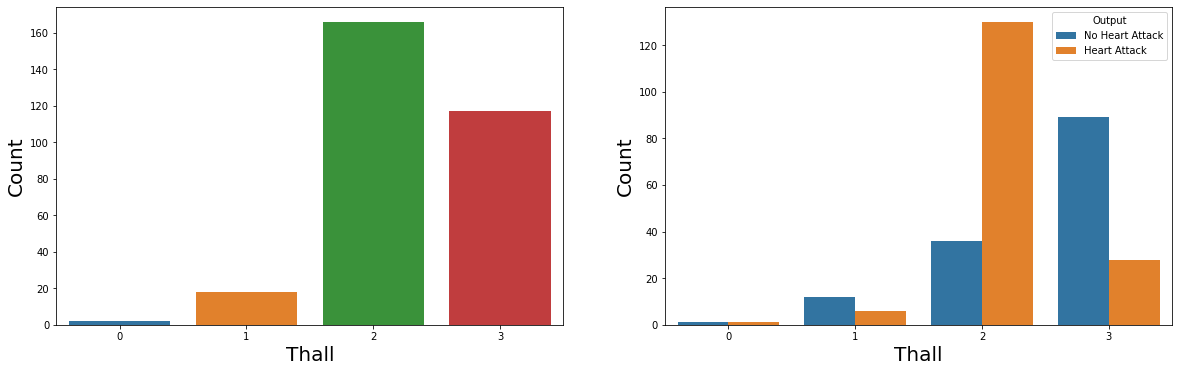

In [7]:
#categorical Analysis
cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
status = ['No Heart Attack', 'Heart Attack']

for i in range(len(cat)):
    
    plt.figure(figsize=(20,55))
    
    plt.subplot(len(cat),2,1)
    sns.countplot(x=cat[i] , data=df)
    plt.xlabel(cat[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    if i == 0:
        plt.title('Categorical Features', fontsize=22)
    
    plt.subplot(len(cat),2,2)
    sns.countplot(x=cat[i], hue='output', data = df)
    plt.xlabel(cat[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.legend(title = 'Output', labels = status)
    if i == 0:
        plt.title('Countribution of Categorical Features for Heart Attack', fontsize=22)
    
    plt.show()

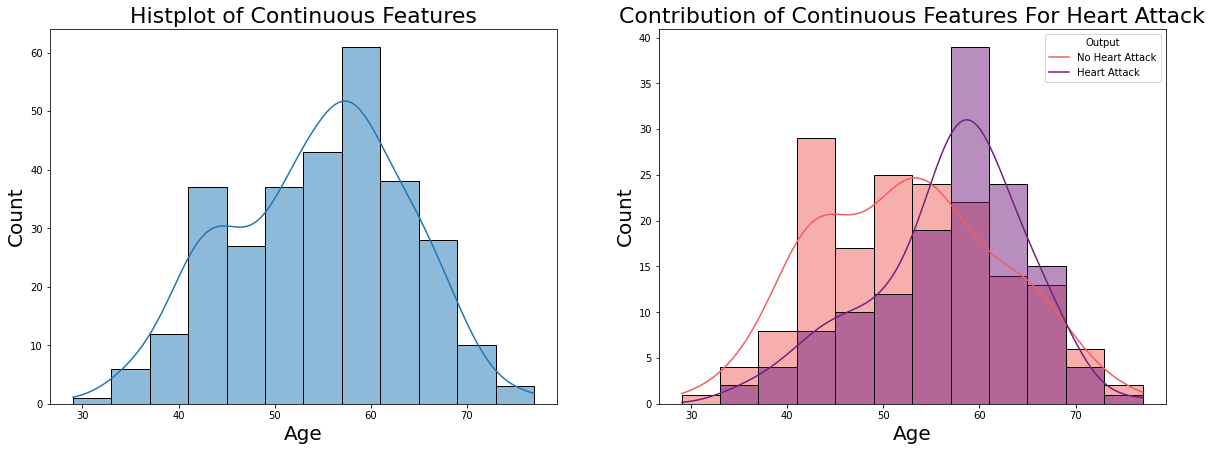

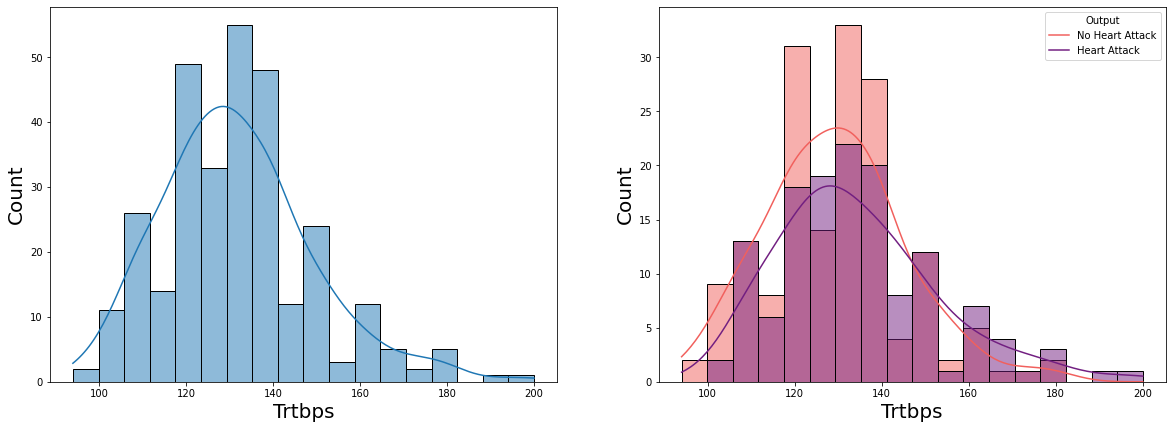

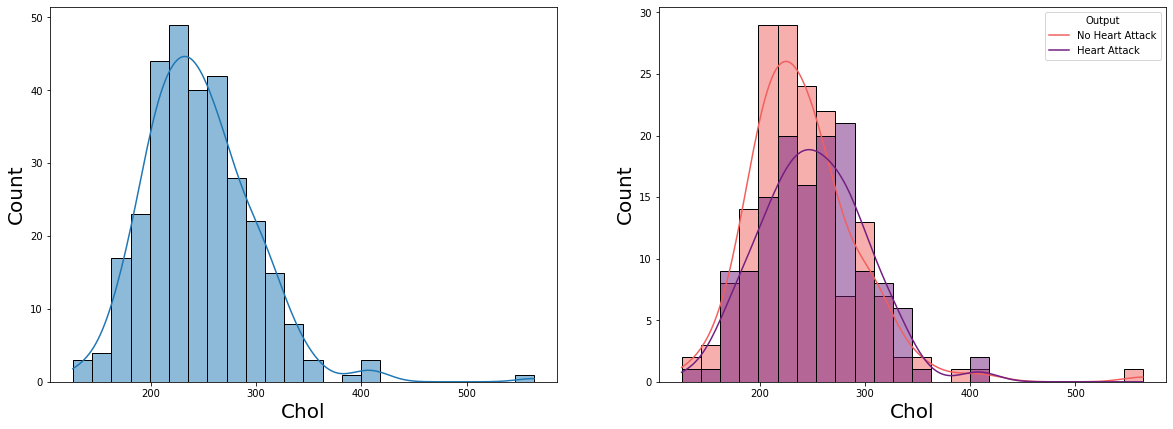

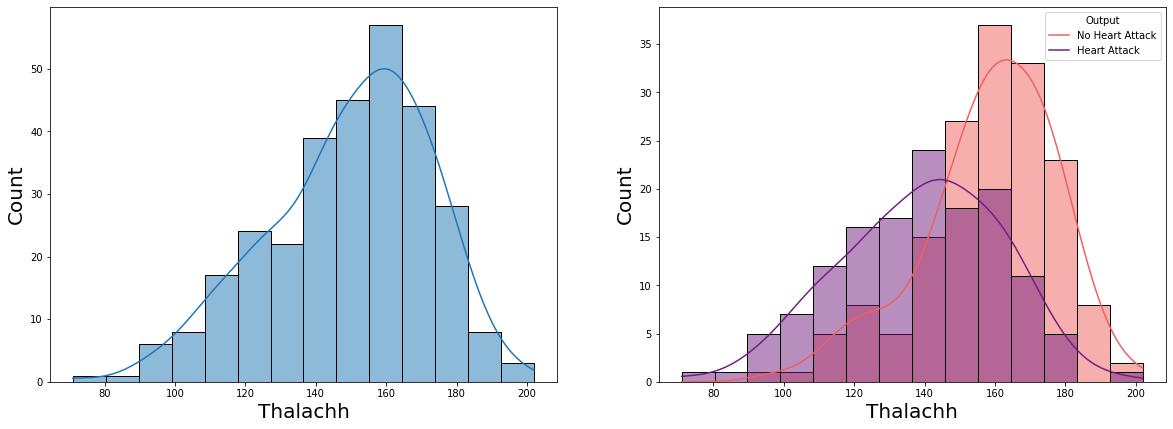

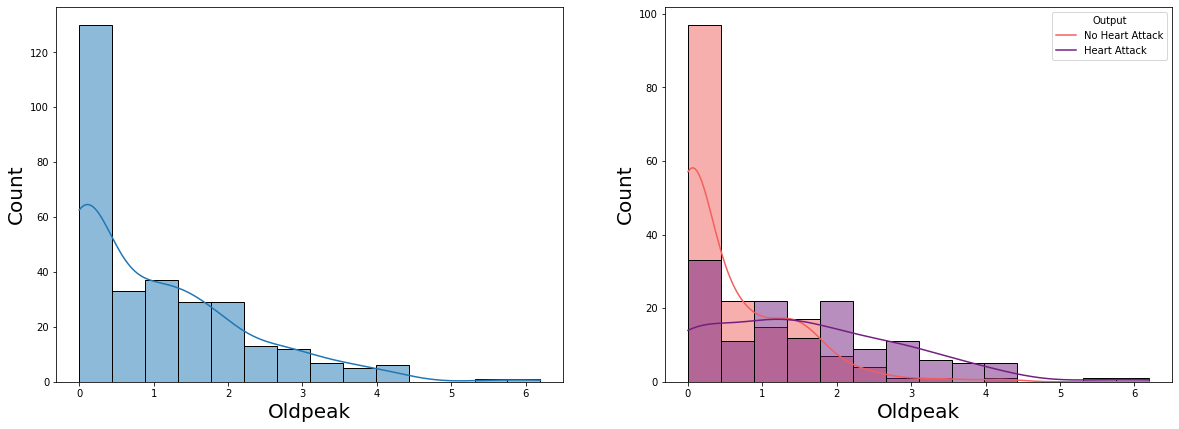

In [8]:
# Continuous Features Analysis
cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
status = ['No Heart Attack', 'Heart Attack']

for i in range(len(cont)):
    
    plt.figure(figsize=(20,40))
    
    plt.subplot(len(cont),2,1)
    sns.histplot(x=cont[i] , data=df, kde=True)
    plt.xlabel(cont[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    if i == 0:
        plt.title('Histplot of Continuous Features', fontsize=22)
    
    plt.subplot(len(cont),2,2)
    sns.histplot(x=cont[i], hue='output', data = df, palette='magma', kde=True)
    plt.xlabel(cont[i].capitalize(), fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.legend(title = 'Output', labels = status)
    if i == 0:
        plt.title('Contribution of Continuous Features For Heart Attack', fontsize=22)
    
    plt.show()

# Check For The Correlation Matrix 

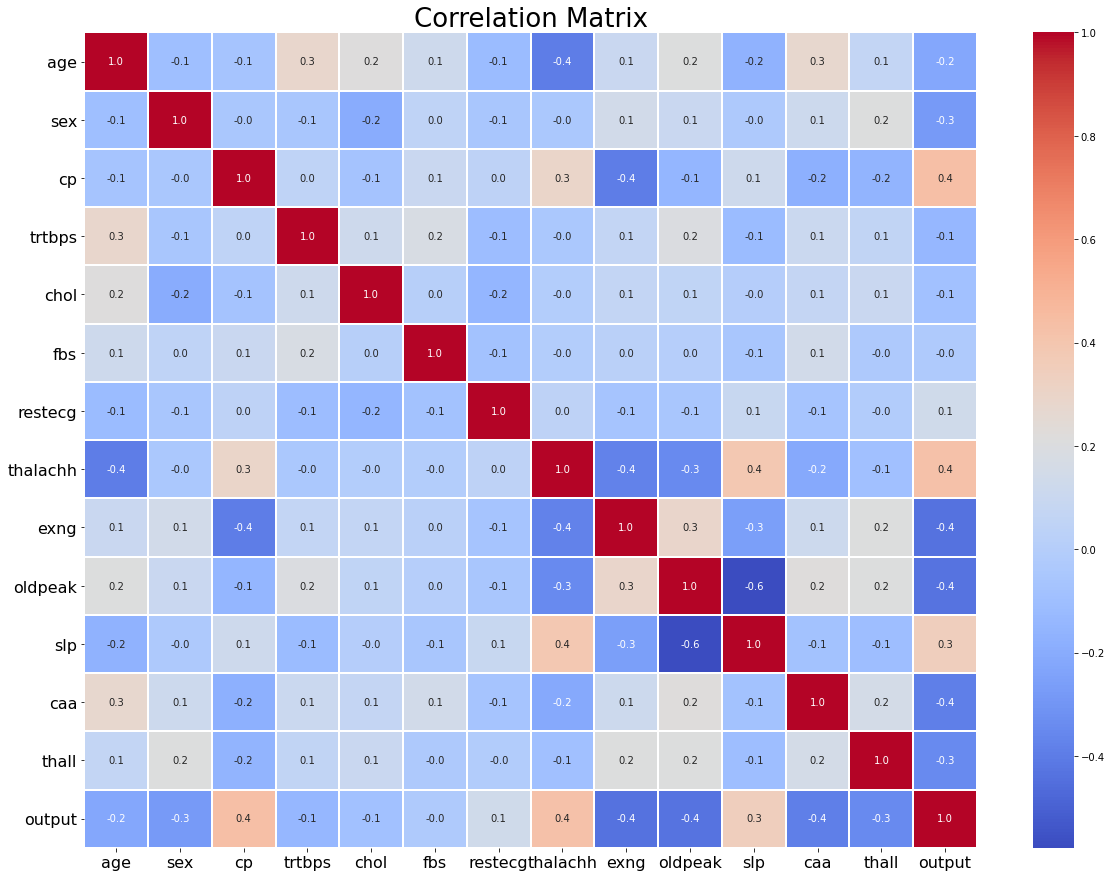

In [9]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, fmt='.1f', linewidths=0.1);
plt.yticks(rotation=0, size=16)
plt.xticks(size=16)
plt.title('Correlation Matrix', size=26)
plt.show()

In [10]:
#take the features which have score above 0.25
corr = abs(df.corr()['output'])
corr[corr>0.25]

sex         0.280937
cp          0.433798
thalachh    0.421741
exng        0.436757
oldpeak     0.430696
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64

In [11]:
x = np.array([[df.sex, df.cp, df.thalachh, df.exng, df.oldpeak, df.slp, df.caa, df.thall]])
XR = x.reshape(x.shape[1:])
X = XR.transpose()
y = np.array(df['output'].values.tolist())

print (X.shape)
print (y.shape)

(303, 8)
(303,)


In [12]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=5)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=300)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Accuracy', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.94      0.94      0.94        31

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61


Accuracy 0.9344262295081968


In [15]:
#Check for MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred)

0.06557377049180328

<AxesSubplot:>

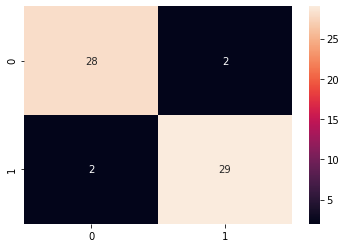

In [16]:
#show the confussion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)